The following project is on identifying the digits. The dataset is taken from keras library for the same.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras




*   The dataset is picture of 10 digits.





In [2]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step




*   Giving Class Names



In [3]:
class_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

In [16]:
trainX

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
trainY

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
trainX.shape

(60000, 28, 28)

In [18]:
trainY.shape

(60000,)

In [19]:
len(trainY)

60000

The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels.

In [21]:
len(testX)

10000

And there are 10000 images in the testing dataset

Visualizing the first image of the dataset

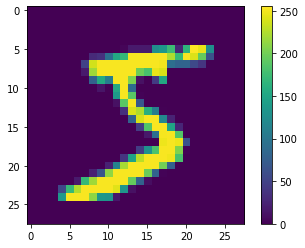

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scaling these value to range of 0 to 1 before feeding the neural network. This 250 value is taken from the above graph we can the the value ranges between 0 to 250

In [7]:
train_images=trainX/250
test_images=testX/250

Seeing the first few pictures with their class labels

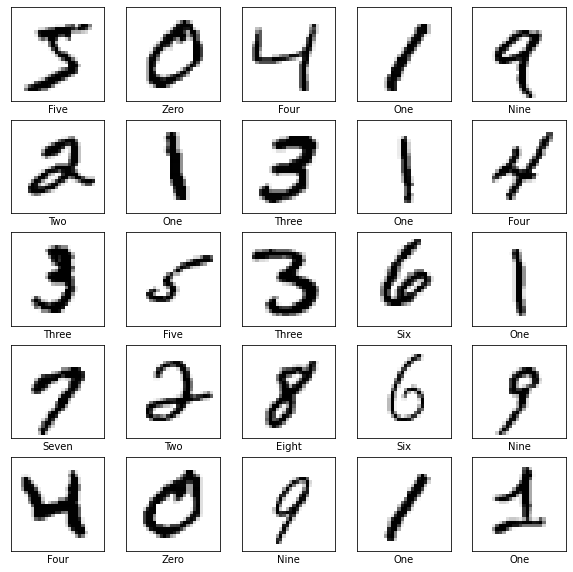

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()

Building The model

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a output array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

After defining the layers the model needs to be optimized, So for the optimization adam function has been used which is an extension of stochastic gradient descent and entropy has been used as loss function.
For the evaluation metrics, accuracy has been used.

In [23]:
model.fit(train_images, trainY, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0117 - accuracy: 0.9962
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0096 - accuracy: 0.9970
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - accuracy: 0.9972
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0087 - accuracy: 0.9974
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0076 - accuracy: 0.9976


In [24]:
test_loss, test_acc = model.evaluate(test_images,  testY, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.1048 - accuracy: 0.9767

Test accuracy: 0.9767000079154968


There is not much difference between train and  test  accuracy so the model is not overfitting the test data.